In [1]:
import sys
sys.path.append("../")
import os
import pickle as pkl
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import math
import seaborn as sns
import matplotlib.pyplot as plt


from coh_tools import *
from get_data import *

In [2]:
#dataframes = get_dataframes("/home/julien/school/lab/opto_data_analysis", 
#                     "/mnt/hdd2tb/lab/elife/data", only_paired=False,
#                     skip_short=True, scale_PCA=False)

# dataframes = get_dataframes("C:/Users/julienb/lab/opto_data_analysis", "C:/Users/julienb/lab/data", only_paired=False,
#                              skip_short=True, scale_PCA=False, get_cond=False)

# dataframes = get_dataframes("C:\\Users\\julien\\lab\\opto_data_analysis", "D:\\lab\\elife\\data", only_paired=False,
#                     skip_short=False, scale_PCA=False)

dataframes = pkl.load(open("D:\gdrive\opto_data\final\20sec_processed_optodata_withshort_5aug20.pkl", "rb"))

OSError: [Errno 22] Invalid argument: 'D:\\gdrive\\opto_data\x0cinal\x10sec_processed_optodata_withshort_5aug20.pkl'

In [3]:
dataframes["theta"].shape

(1618745, 50)

In [4]:
for band in ["theta", "beta", "gamma", "high_gamma"]:
    dataframes[band]["Las1_distance_to_closer"] = dataframes[band][["Distance_to_A1", "Distance_to_A2"]].min(axis=1)    
    dataframes[band]["Las1_distance_to_further"] = dataframes[band][["Distance_to_A1", "Distance_to_A2"]].max(axis=1)    
    dataframes[band]["Las2_distance_to_closer"] = dataframes[band][["Distance_to_B1", "Distance_to_B2"]].min(axis=1)    
    dataframes[band]["Las2_distance_to_further"] = dataframes[band][["Distance_to_B1", "Distance_to_B2"]].max(axis=1)    
                                                           

In [5]:
for band in dataframes.keys():
    dataframes[band] = dataframes[band][dataframes[band]["In_upper_triangle"] == 1]
    dataframes[band] = dataframes[band].drop(columns=["On_diagonal", "In_upper_triangle", "Num_lasers"])


In [6]:
dataframes["theta"]["Experiment_block_key"].unique()

array(['MonkeyG_20150908_Session2_M1', 'MonkeyG_20150908_Session3_M1',
       'MonkeyG_20150908_Session4_M1', 'MonkeyG_20150909_Session2_M1',
       'MonkeyG_20150909_Session3_M1', 'MonkeyG_20150909_Session4_M1',
       'MonkeyG_20150909_Session5_M1', 'MonkeyG_20150910_Session3_S1',
       'MonkeyG_20150910_Session4_S1', 'MonkeyG_20150910_Session6_S1',
       'MonkeyG_20150910_Session7_S1', 'MonkeyG_20150911_Session6_S1',
       'MonkeyG_20150911_Session7_S1', 'MonkeyG_20150914_Session1_S1',
       'MonkeyG_20150914_Session3_S1', 'MonkeyG_20150915_Session2_S1',
       'MonkeyG_20150915_Session3_S1', 'MonkeyG_20150915_Session4_S1',
       'MonkeyG_20150915_Session5_S1', 'MonkeyG_20150916_Session4_S1',
       'MonkeyG_20150917_Session1_M1', 'MonkeyG_20150917_Session1_S1',
       'MonkeyG_20150917_Session2_M1', 'MonkeyG_20150917_Session2_S1',
       'MonkeyG_20150917_Session3_M1', 'MonkeyG_20150917_Session3_S1',
       'MonkeyG_20150918_Session1_M1', 'MonkeyG_20150918_Session1_S1',
      

In [7]:
for bad_session in ["MonkeyG_20150918_Session1_M1", "MonkeyG_20150918_Session1_S1", 
                    "MonkeyG_20150917_Session1_M1", "MonkeyG_20150917_Session2_M1",
                    "MonkeyG_20150917_Session3_M1"]:
    for band in dataframes.keys():
        dataframes[band] = dataframes[band][dataframes[band]["Experiment_block_key"] != bad_session]

In [8]:
dataframes["theta"]["Experiment_block_key"].unique()

array(['MonkeyG_20150908_Session2_M1', 'MonkeyG_20150908_Session3_M1',
       'MonkeyG_20150908_Session4_M1', 'MonkeyG_20150909_Session2_M1',
       'MonkeyG_20150909_Session3_M1', 'MonkeyG_20150909_Session4_M1',
       'MonkeyG_20150909_Session5_M1', 'MonkeyG_20150910_Session3_S1',
       'MonkeyG_20150910_Session4_S1', 'MonkeyG_20150910_Session6_S1',
       'MonkeyG_20150910_Session7_S1', 'MonkeyG_20150911_Session6_S1',
       'MonkeyG_20150911_Session7_S1', 'MonkeyG_20150914_Session1_S1',
       'MonkeyG_20150914_Session3_S1', 'MonkeyG_20150915_Session2_S1',
       'MonkeyG_20150915_Session3_S1', 'MonkeyG_20150915_Session4_S1',
       'MonkeyG_20150915_Session5_S1', 'MonkeyG_20150916_Session4_S1',
       'MonkeyG_20150917_Session1_S1', 'MonkeyG_20150917_Session2_S1',
       'MonkeyG_20150917_Session3_S1', 'MonkeyG_20150921_Session3_S1',
       'MonkeyG_20150921_Session5_S1', 'MonkeyG_20150922_Session1_S1',
       'MonkeyG_20150922_Session2_S1', 'MonkeyG_20150922_Session3_S1',
      

In [9]:
dataframes["theta"].columns

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
       'Distance_to_A1', 'Distance_to_B1', 'Distance_to_A2', 'Distance_to_B2',
       'PC1a_mean', 'PC2a_mean', 'PC1b_mean', 'PC2b_mean', 'PC1a_sd',
       'PC2a_sd', 'PC1b_sd', 'PC2b_sd', 'From_electrodes', 'To_electrodes',
       'Initial_coh_sd', 'Cond_coh_sd', 'Coh_diff_sd', 'Coh_sum_sd',
       'Coh_diff_avg', 'Coh_sum_mag', 'Pair_avg_net_coh',
       'Pair_avg_net_coh_sd', 'Graph_avg_net_coh', 'Graph_avg_net_coh_sd',
       'Elec_cov', 'Time_cov', 'Avg_coh_to_stim', 'Avg_diff_1-2_stim',
       'Avg_stim_diff_btw_elec', 'End_diff', 'Delays', 'Monkeys', 'Block_num',
       'Experiment_block_key', 'Both_M1', 'Both_S1', 'cond_diff_Y',
       'cond_diff_percent_Y', 'diff_Y', 'diff_percent_Y', 'Is_stim_site_1',
       'Is_stim_site_2', 'Las1_distance_to_closer', 'Las1_distance_to_further',
       'Las2_distance_to_closer', 'Las2_distance_to_further'],
      dtype='object')

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
dataframes["theta"].head()

Initial_coh   Distance  Coh_proj  Coh_proj_sd     Phase  Distance_to_A1  \
1     0.954702  10.049876  0.126283          0.0  0.154126        7.211103   
2     0.810254   8.062258  0.148088          0.0  0.202207        7.211103   
3     0.643965  10.198039  0.164698          0.0  0.330463        7.211103   
4     0.543137   8.246211  0.168845          0.0  0.380658        7.211103   
5     0.433848   4.472136  0.167676          0.0  0.442892        7.211103   

   Distance_to_B1  Distance_to_A2  Distance_to_B2  PC1a_mean  PC2a_mean  \
1       12.727922        7.810250        8.062258   0.856552    3.04469   
2       12.727922        6.403124        8.062258   0.856552    3.04469   
3       12.727922        7.211103        7.071068   0.856552    3.04469   
4       12.727922        5.656854        7.071068   0.856552    3.04469   
5       12.727922        4.000000        8.602325   0.856552    3.04469   

   PC1b_mean  PC2b_mean  PC1a_sd  PC2a_sd  PC1b_sd  PC2b_sd  From_electrodes  \
1   1.240807   2.325278      0.0      0.0      0.0      0.0               12   
2   1.678221   1.594239      0.0      0.0      0.0      0.0               12   
3   1.951809   0.906759      0.0      0.0      0.0      0.0               12   
4   2.075984   0.640262      0.0      0.0      0.0      0.0               12   
5   2.179428   0.512954      0.0      0.0      0.0      0.0               12   

   To_electrodes  Initial_coh_sd  Cond_coh_sd  Coh_diff_sd  Coh_sum_sd  \
1             14             0.0     0.027534          0.0         0.0   
2             16             0.0     0.125986          0.0         0.0   
3             18             0.0     0.105459          0.0         0.0   
4             20             0.0     0.127022          0.0         0.0   
5             22             0.0     0.148891          0.0         0.0   

   Coh_diff_avg  Coh_sum_mag  Pair_avg_net_coh  Pair_avg_net_coh_sd  \
1      0.092388     0.718856          0.624746                  0.0   
2      0.182376     0.799992          0.709740                  0.0   
3      0.267307     0.870627          0.786008                  0.0   
4      0.298962     0.894873          0.811872                  0.0   
5      0.313400     0.902099          0.819724                  0.0   

   Graph_avg_net_coh  Graph_avg_net_coh_sd  Elec_cov  Time_cov  \
1            0.60295                   0.0  0.031234       NaN   
2            0.60295                   0.0  0.030334       NaN   
3            0.60295                   0.0  0.026526       NaN   
4            0.60295                   0.0  0.023726       NaN   
5            0.60295                   0.0  0.020412       NaN   

   Avg_coh_to_stim  Avg_diff_1-2_stim  Avg_stim_diff_btw_elec  End_diff  \
1         0.314170           0.067648                0.111857  0.032595   
2         0.369844           0.129319                0.223206  0.091672   
3         0.421985           0.174542                0.327487  0.166621   
4         0.442936           0.199648                0.369390  0.187723   
5         0.453101           0.227692                0.389720  0.141109   

   Delays Monkeys  Block_num          Experiment_block_key  Both_M1  Both_S1  \
1    10.0       G        1.0  MonkeyG_20150908_Session2_M1      1.0      0.0   
2    10.0       G        1.0  MonkeyG_20150908_Session2_M1      1.0      0.0   
3    10.0       G        1.0  MonkeyG_20150908_Session2_M1      1.0      0.0   
4    10.0       G        1.0  MonkeyG_20150908_Session2_M1      1.0      0.0   
5    10.0       G        1.0  MonkeyG_20150908_Session2_M1      1.0      0.0   

   cond_diff_Y  cond_diff_percent_Y    diff_Y  diff_percent_Y  Is_stim_site_1  \
1    -0.004991            -0.005228 -0.024744       -0.025918               0   
2    -0.097512            -0.120348 -0.245784       -0.303342               0   
3     0.121825             0.189179  0.139239        0.216222               0   
4     0.178486             0.328620  0.229713        0.422937               0

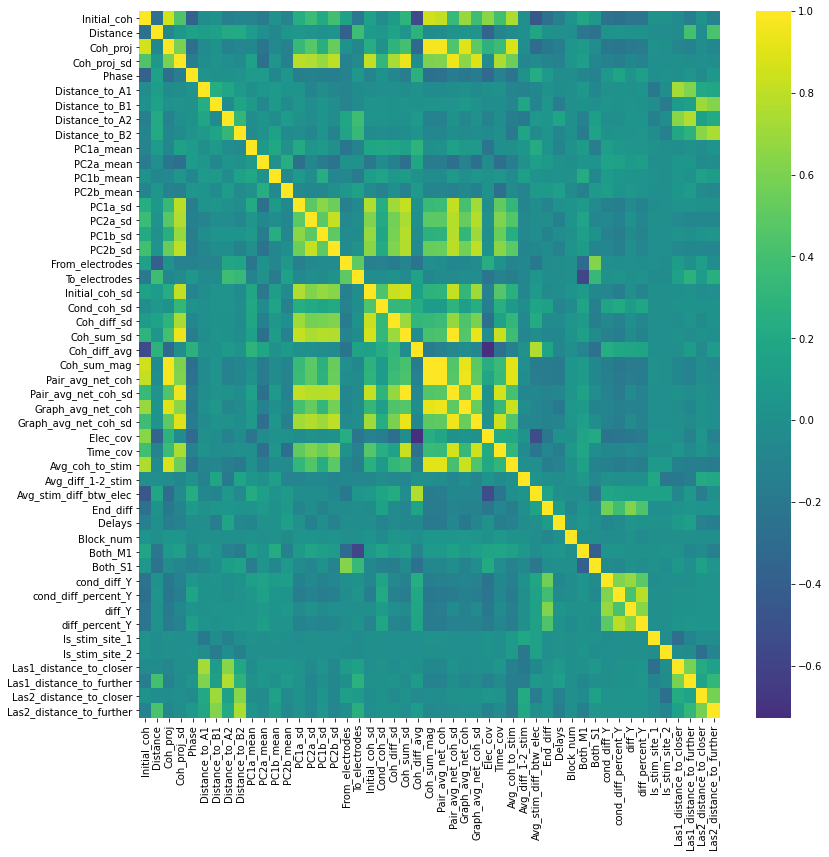

In [12]:
plt.figure(figsize=(13, 13))
sns.heatmap(dataframes["theta"].corr(), cmap="viridis", center=0)

In [13]:
for band in ["theta", "beta", "gamma", "high_gamma"]:
    #dataframes[band].rename(columns={"Coh_diff_mag": "Coh_diff_avg"}, inplace=True)
    dataframes[band] = dataframes[band].drop(columns = ['Distance_to_A1', 'Distance_to_B1', 'Distance_to_A2', 'Distance_to_B2',
                                                       'Coh_sum_mag', 'Coh_sum_sd', 'PC1a_mean', 'PC2a_mean', 'PC1b_mean', 
                                                        'PC2b_mean', 'PC1a_sd', 'PC2a_sd', 'PC1b_sd', 'PC2b_sd',
                                                       'Cond_coh_sd', 'Avg_diff_1-2_stim'])


In [14]:
for band in dataframes.keys():
    dataframes[band]["Coh_diff_mag"] = dataframes[band]["Coh_diff_avg"]
    dataframes[band] = dataframes[band].drop(columns = ["Coh_diff_avg"])

In [15]:
# if during-stim data

#for band in ["theta", "beta", "gamma", "high_gamma"]:    
#    dataframes[band] = dataframes[band].drop(columns = ['cond_diff_Y', 'cond_diff_percent_Y'])

In [16]:
dataframes["theta"].columns

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
       'From_electrodes', 'To_electrodes', 'Initial_coh_sd', 'Coh_diff_sd',
       'Pair_avg_net_coh', 'Pair_avg_net_coh_sd', 'Graph_avg_net_coh',
       'Graph_avg_net_coh_sd', 'Elec_cov', 'Time_cov', 'Avg_coh_to_stim',
       'Avg_stim_diff_btw_elec', 'End_diff', 'Delays', 'Monkeys', 'Block_num',
       'Experiment_block_key', 'Both_M1', 'Both_S1', 'cond_diff_Y',
       'cond_diff_percent_Y', 'diff_Y', 'diff_percent_Y', 'Is_stim_site_1',
       'Is_stim_site_2', 'Las1_distance_to_closer', 'Las1_distance_to_further',
       'Las2_distance_to_closer', 'Las2_distance_to_further', 'Coh_diff_mag'],
      dtype='object')

In [17]:
# pkl.dump(dataframes, open("/home/julien/lab/data/opto_data/processed_optodata_withshort_21jul20.pkl", "wb"))
pkl.dump(dataframes, open("C:\\Users\\julien\\lab\\data\\20sec_processed_optodata_withshort_5aug20.pkl", "wb"))